In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/crimes_clean.csv")
df.head()

,crime_id,case_number,crime_date,primary_type,description,location_description,arrest,domestic,community_area,year,latitude,longitude
0,1,JC100000,2018-01-01 00:00:00,THEFT,Description of crime,ALLEY,f,f,1,2021,41.989678,-87.749344
1,2,JC100001,2018-01-01 12:00:00,ASSAULT,Description of crime,STREET,f,f,11,2018,41.749867,-87.826868
2,3,JC100002,2018-01-02 00:00:00,ASSAULT,Description of crime,RESIDENCE,f,t,57,2022,41.845770,-87.501294
3,4,JC100003,2018-01-02 12:00:00,CRIMINAL DAMAGE,Description of crime,STREET,t,f,50,2019,41.738484,-87.758218
4,5,JC100004,2018-01-03 00:00:00,BATTERY,Description of crime,STREET,f,f,23,2021,42.045067,-87.746876


In [2]:
# Basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   crime_id              200 non-null    int64  
 1   case_number           200 non-null    object 
 2   crime_date            200 non-null    object 
 3   primary_type          200 non-null    object 
 4   description           200 non-null    object 
 5   location_description  200 non-null    object 
 6   arrest                200 non-null    object 
 7   domestic              200 non-null    object 
 8   community_area        200 non-null    int64  
 9   year                  200 non-null    int64  
 10  latitude              200 non-null    float64
 11  longitude             200 non-null    float64
dtypes: float64(2), int64(3), object(7)
memory usage: 18.9+ KB


In [3]:
# Check for missing values
df.isna().sum()

crime_id                0
case_number             0
crime_date              0
primary_type            0
description             0
location_description    0
arrest                  0
domestic                0
community_area          0
year                    0
latitude                0
longitude               0
dtype: int64

In [4]:
# Quick statistics
df.describe(include="all")

,crime_id,case_number,crime_date,primary_type,description,location_description,arrest,domestic,community_area,year,latitude,longitude
count,200.000000,200,200,200,200,200,200,200,200.000000,200.00000,200.000000,200.000000
unique,NaN,200,200,6,1,6,2,2,NaN,NaN,NaN,NaN
top,NaN,JC100000,2018-01-01 00:00:00,ASSAULT,Description of crime,APARTMENT,f,f,NaN,NaN,NaN,NaN
freq,NaN,1,1,45,200,38,149,166,NaN,NaN,NaN,NaN
mean,100.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.870000,2019.07000,41.864623,-87.728583
std,57.879185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.102599,2.63435,0.122401,0.130862
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2015.00000,41.652554,-87.945603
25%,50.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.750000,2017.00000,41.752893,-87.846689
50%,100.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.500000,2019.00000,41.884916,-87.733543
75%,150.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.250000,2021.00000,41.976547,-87.622277


In [5]:
# Convert crime_date to datetime
df['crime_date'] = pd.to_datetime(df['crime_date'])

# Convert arrest and domestic to boolean
df['arrest'] = df['arrest'].map({'t': True, 'f': False})
df['domestic'] = df['domestic'].map({'t': True, 'f': False})

# Verify changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   crime_id              200 non-null    int64         
 1   case_number           200 non-null    object        
 2   crime_date            200 non-null    datetime64[ns]
 3   primary_type          200 non-null    object        
 4   description           200 non-null    object        
 5   location_description  200 non-null    object        
 6   arrest                200 non-null    bool          
 7   domestic              200 non-null    bool          
 8   community_area        200 non-null    int64         
 9   year                  200 non-null    int64         
 10  latitude              200 non-null    float64       
 11  longitude             200 non-null    float64       
dtypes: bool(2), datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 1

In [6]:
# Query 2: Crime count by primary type
crime_type_counts = (
    df.groupby('primary_type')
      .size()
      .reset_index(name='crime_count')
      .sort_values(by='crime_count', ascending=False)
)

crime_type_counts

,primary_type,crime_count
0,ASSAULT,45
2,CRIMINAL DAMAGE,37
5,THEFT,36
3,NARCOTICS,32
1,BATTERY,30
4,ROBBERY,20


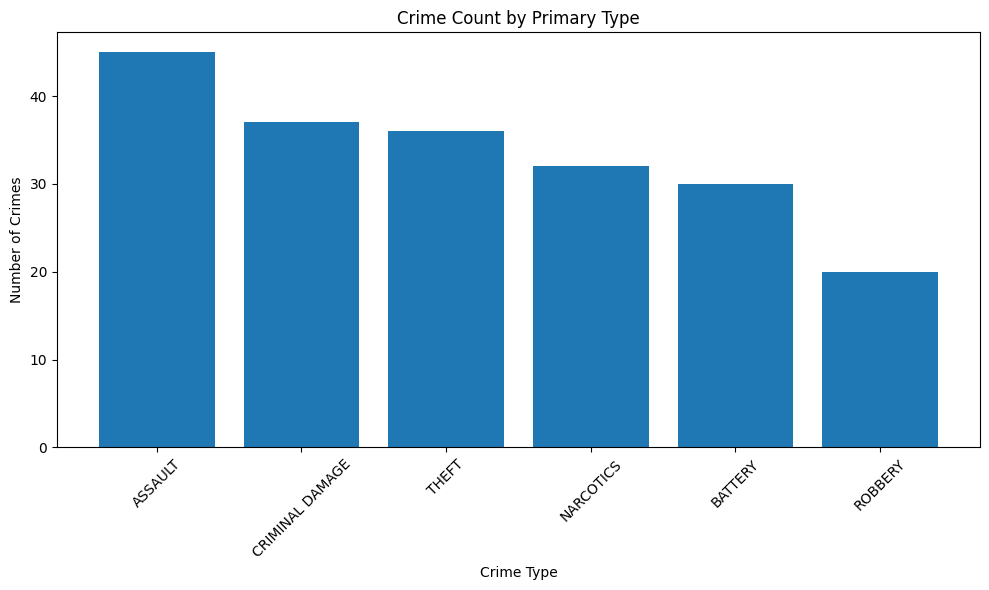

In [7]:
# Bar chart for crime counts by primary type
plt.figure(figsize=(10, 6))
plt.bar(crime_type_counts['primary_type'], crime_type_counts['crime_count'])
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.title('Crime Count by Primary Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
# Query 3: Arrest vs No Arrest counts
arrest_counts = (
    df['arrest']
    .value_counts()
    .reset_index()
)

arrest_counts.columns = ['arrest_made', 'crime_count']
arrest_counts

,arrest_made,crime_count
0,False,149
1,True,51


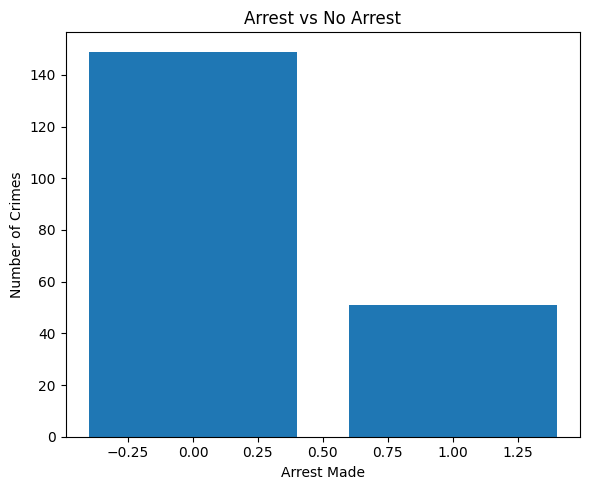

In [9]:
# Bar chart: Arrest vs No Arrest
plt.figure(figsize=(6, 5))
plt.bar(arrest_counts['arrest_made'], arrest_counts['crime_count'])
plt.xlabel('Arrest Made')
plt.ylabel('Number of Crimes')
plt.title('Arrest vs No Arrest')
plt.tight_layout()
plt.show()

In [10]:
# Query 1: Crime count by year
crimes_by_year = (
    df.groupby('year')
      .size()
      .reset_index(name='crime_count')
      .sort_values('year')
)

crimes_by_year

,year,crime_count
0,2015,25
1,2016,18
2,2017,23
3,2018,22
4,2019,20
5,2020,17
6,2021,28
7,2022,25
8,2023,22


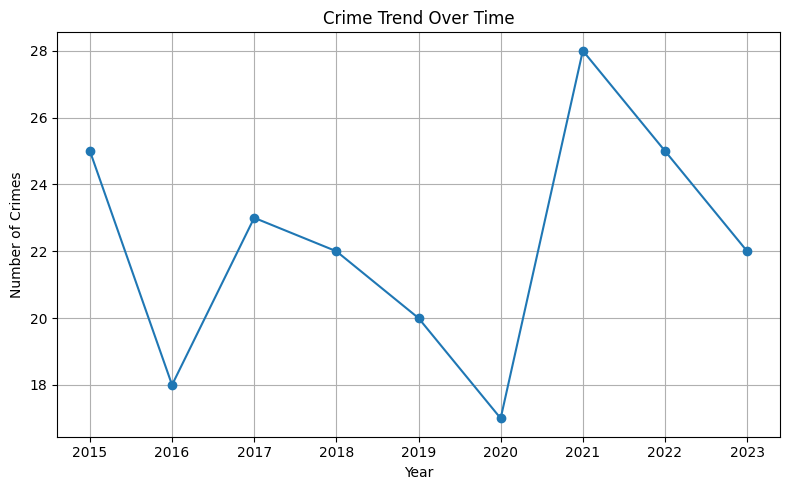

In [11]:
# Line chart: Crime trend over years
plt.figure(figsize=(8, 5))
plt.plot(crimes_by_year['year'], crimes_by_year['crime_count'], marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Crime Trend Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# Query 4: Crime count by location description
crime_by_location = (
    df.groupby('location_description')
      .size()
      .reset_index(name='crime_count')
      .sort_values(by='crime_count', ascending=False)
)

crime_by_location

,location_description,crime_count
1,APARTMENT,38
3,RESIDENCE,36
5,STREET,36
2,PARKING LOT,32
4,SIDEWALK,31
0,ALLEY,27


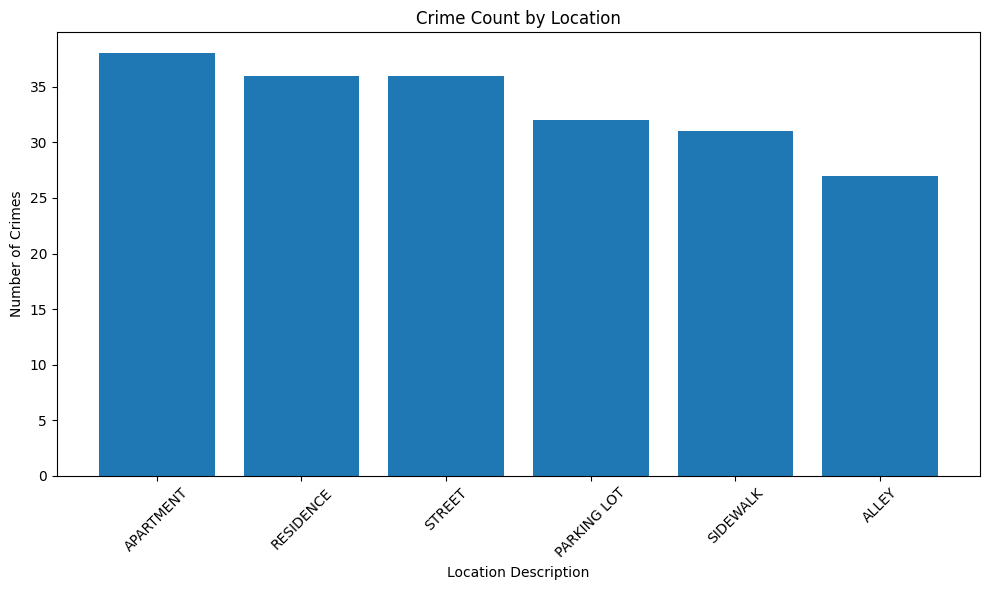

In [13]:
# Bar chart: Crime count by location
plt.figure(figsize=(10, 6))
plt.bar(crime_by_location['location_description'], crime_by_location['crime_count'])
plt.xlabel('Location Description')
plt.ylabel('Number of Crimes')
plt.title('Crime Count by Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
import os

# Create output folder if it doesn't exist
os.makedirs("output", exist_ok=True)

# Export final analysis tables
crime_type_counts.to_csv("output/crime_by_type.csv", index=False)
arrest_counts.to_csv("output/arrest_summary.csv", index=False)
crimes_by_year.to_csv("output/crime_trend_by_year.csv", index=False)
crime_by_location.to_csv("output/crime_by_location.csv", index=False)

print("✅ Files exported to /output")

✅ Files exported to /output


In [15]:
!pip install folium

In [16]:
import folium
from folium.plugins import HeatMap

/Users/mohammedloulou/Documents/citycrime-analytics/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [17]:
# Prepare heat map data
heat_data = df[['latitude', 'longitude']].dropna()

# Create base map centered on Chicago
crime_map = folium.Map(
    location=[41.88, -87.63],
    zoom_start=10
)

# Add heat layer
HeatMap(
    data=heat_data.values,
    radius=10,
    blur=15,
    max_zoom=1
).add_to(crime_map)

crime_map

## Initial heat map (before geospatial filtering)

In [18]:
df[['latitude', 'longitude']].describe()

,latitude,longitude
count,200.000000,200.000000
mean,41.864623,-87.728583
std,0.122401,0.130862
min,41.652554,-87.945603
25%,41.752893,-87.846689
50%,41.884916,-87.733543
75%,41.976547,-87.622277
max,42.049174,-87.501294


In [19]:
df_clean_geo = df[
    (df['latitude'].between(41.65, 42.05)) &
    (df['longitude'].between(-87.95, -87.55))
]

In [20]:
# Rebuild heat map using filtered geographic data
heat_data = df_clean_geo[['latitude', 'longitude']].dropna()

crime_map = folium.Map(
    location=[41.88, -87.63],
    zoom_start=10
)

HeatMap(
    data=heat_data.values,
    radius=10,
    blur=15,
    max_zoom=1
).add_to(crime_map)

crime_map


## Geospatial Analysis (Filtered Heat Map)


**Geospatial Data Note**

Some crime points may appear over Lake Michigan due to approximate or
synthetic coordinate data. In real-world applications, land-boundary
validation or spatial joins would be applied to ensure accurate placement.


In [21]:
crime_map.save("output/chicago_crime_heatmap_filtered.html")
print("✅ Saved filtered heat map")

✅ Saved filtered heat map


In [22]:
arrest_rate_by_type = (
    df.groupby('primary_type')['arrest']
      .mean()
      .reset_index(name='arrest_rate')
      .sort_values('arrest_rate', ascending=False)
)

arrest_rate_by_type

,primary_type,arrest_rate
1,BATTERY,0.366667
2,CRIMINAL DAMAGE,0.324324
3,NARCOTICS,0.250000
5,THEFT,0.250000
4,ROBBERY,0.200000
0,ASSAULT,0.155556


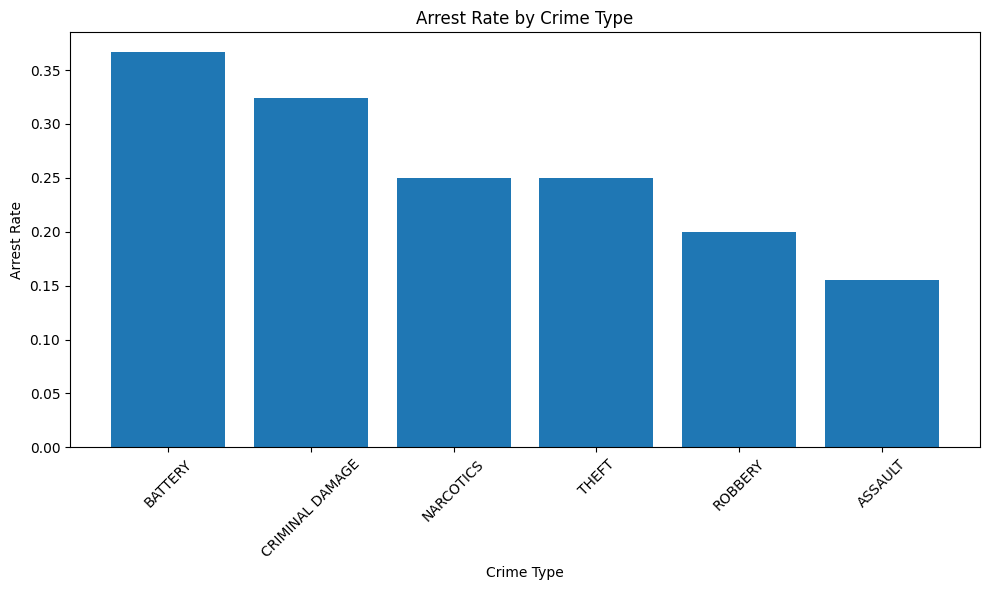

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(arrest_rate_by_type['primary_type'], arrest_rate_by_type['arrest_rate'])
plt.xlabel('Crime Type')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Crime Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
arrest_rate_by_type.to_csv("output/arrest_rate_by_type.csv", index=False)
print("✅ Exported: output/arrest_rate_by_type.csv")

✅ Exported: output/arrest_rate_by_type.csv


## Conclusion & Key Insights

This analysis explored a sample of Chicago crime records to identify patterns across **crime types**, **time**, **locations**, and **arrest outcomes** using exploratory data analysis and geospatial visualization.

**Key findings:**
- **ASSAULT** was the most frequently reported crime type in this dataset, followed by **CRIMINAL DAMAGE** and **THEFT**.
- The majority of crimes **did not result in an arrest**, indicating that arrests are relatively infrequent within this sample.
- Crime trends show **year-to-year variation**, with a noticeable increase around 2021 compared to some earlier years.
- Most crimes occurred in **APARTMENT, RESIDENCE, and STREET** locations.
- The **filtered geographic heat map** reveals spatial clustering of crime incidents across Chicago, demonstrating how location-based analysis adds insight beyond summary tables.

**Limitations & notes:**
- The dataset contains only **200 records**, so results should be interpreted as **directional** rather than definitive.
- Some geographic coordinates may be approximate or synthetic; geospatial filtering improves realism, but real-world analyses would apply stricter spatial validation.

**Future improvements:**
- Analyze crime patterns by **time of day**, **community area**, and **domestic vs non-domestic** incidents.
- Expand the dataset to improve trend stability and geographic accuracy.
- Incorporate predictive modeling to explore factors associated with higher arrest likelihood.